## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

In [2]:
data = pd.read_csv("datasets/netflix.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Assess data


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Note: 
- "date_added" does not have meaningful
- There are missing values in columns "director", "cast", "country", and "rating"

## Clean data


In [4]:
df = data.copy()

### Task 1: drop duplicate values in df

In [5]:
# check whether df has duplicate values or not
df.duplicated().sum()

0

=> There are no duplicate values in df

### Task 2: drop column "date_added"

In [6]:
df.drop(['date_added'], axis=1, inplace=True)
# test
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Task 3: fill missing values in column "director", "cast", "country", and "rating"
Because we do not have any values to substitude for those columns, so we will use "unknown" for those columns

In [7]:
# column "director"
df['director'].fillna("unknown", inplace=True)
# column "cast"
df['cast'].fillna("unknown", inplace=True)
# column "country"
df['country'].fillna("unknown", inplace=True)
# column "rating"
df['rating'].fillna("unknown", inplace=True)
# test
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Analyze data
### Question 1: In which year highest number of TV shows & movies were released?

In [12]:
# use groupby and count method to get the number of TV shows and movies for each year
df.groupby('release_year').count()['show_id']

release_year
1925       1
1942       2
1943       3
1944       3
1945       3
        ... 
2017    1012
2018    1121
2019     996
2020     868
2021      31
Name: show_id, Length: 73, dtype: int64

In [20]:
q1 = df.groupby('release_year').count()['show_id']

In [21]:
# use idxmax() to get the answer
q1.idxmax()

2018

Now, we will use the bar chart to clarify our answer

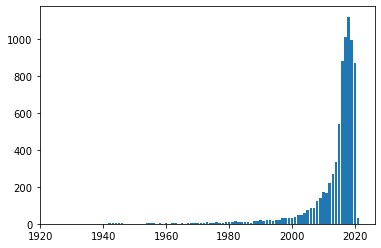

In [14]:
# use plt.bar to plot the bar chart
plt.bar(q1.index, q1)
plt.show()

As we can see above, the highest number of TV shows and movies seem to be released just in the past decade, so we will take from 2010 to 2020 as the boundary for xlim

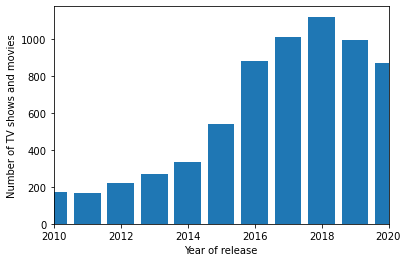

In [15]:
plt.bar(q1.index, q1)
plt.xlim(2010, 2020)
plt.xlabel("Year of release")
plt.ylabel("Number of TV shows and movies")
plt.show()

#### Answer: 
The number of TV shows and movies were released in 2018 is the highest